In [ ]:
pip install wordcloud

In [ ]:
pip install nltk


In [ ]:
pip install seaborn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns
import warnings
import nltk

In [2]:
twitter_data = pd.read_csv("Resources/twitter_data.csv")
twitter_data.head()

,Sl no,Tweets,Search key,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,happy
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,happy
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,happy
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,happy


In [3]:
twitter_data.dropna()

,Sl no,Tweets,Search key,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,happy
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,happy
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,happy
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,happy
...,...,...,...,...
10012,10016,"Tweet #85: @Matteo tweeted ""@GameSpot @Frannkc...",irritating,angry
10013,10017,"Tweet #86: @𝐚𝐧𝐢𝐬𝐭𝐨𝐧 tweeted ""@BRATgiirl_ that’...",irritating,angry
10014,10018,"Tweet #87: @Chowkidar Ricky Sharma tweeted ""@M...",irritating,angry
10015,10019,"Tweet #88: @Katoe.EXE tweeted ""u know what i h...",irritating,angry


In [4]:
twitter_data[['Feeling']]

,Feeling
0,happy
1,happy
2,happy
3,happy
4,happy
...,...
10012,angry
10013,angry
10014,angry
10015,angry


In [7]:
emotion_df = pd.DataFrame(twitter_data, columns=["Search key","Feeling"])
emotion_df

,Search key,Feeling
0,happy moments,happy
1,happy moments,happy
2,happy moments,happy
3,happy moments,happy
4,happy moments,happy
...,...,...
10012,irritating,angry
10013,irritating,angry
10014,irritating,angry
10015,irritating,angry


In [21]:
feelings_data = pd.DataFrame(twitter_data, columns=["Tweets", "Feeling"])
feelings_data

,Tweets,Feeling
0,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy
1,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy
2,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy
3,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy
4,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy
...,...,...
10012,"Tweet #85: @Matteo tweeted ""@GameSpot @Frannkc...",angry
10013,"Tweet #86: @𝐚𝐧𝐢𝐬𝐭𝐨𝐧 tweeted ""@BRATgiirl_ that’...",angry
10014,"Tweet #87: @Chowkidar Ricky Sharma tweeted ""@M...",angry
10015,"Tweet #88: @Katoe.EXE tweeted ""u know what i h...",angry


In [22]:
feelings = feelings_data["Feeling"].count()
feelings

10017

<Figure size 1440x576 with 0 Axes>

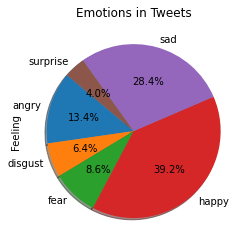

In [23]:
feelings = feelings_data.groupby("Feeling")
feelings_df = pd.DataFrame(feelings["Feeling"].count())
plt.figure(figsize = (20,8))
pie_chart = feelings_df.plot(kind="pie", y="Feeling", title="Emotions in Tweets", autopct="%1.1f%%",  startangle=140, shadow=True, legend=False)

pie_chart
plt.savefig("Resources/Emotion in Tweets - pie.png")

In [24]:
twitter_data.head()

,Sl no,Tweets,Search key,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,happy
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,happy
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,happy
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,happy


In [25]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

clean_tweets = twitter_data[["Tweets"]]

clean_tweets = pd.DataFrame(clean_tweets)
clean_tweets.columns = ["Tweets"]

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
clean_tweets['tweet_without_stopwords'] = clean_tweets['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_tweets.head()

,Tweets,tweet_without_stopwords
0,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...","#1: @fe ed ""RT @MirayaDizon1: Time ticking fas..."
1,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...","#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで、..."
2,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...","#3: @Ris ♡ ed ""Happy birthday one smokin hot m..."
3,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...","#4: @월월 [씍쯴사랑로봇] jwinnie best, cheer jwinnie e..."
4,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...","#5: @Madhurima wth u vc♥ ed ""Good morning dear..."


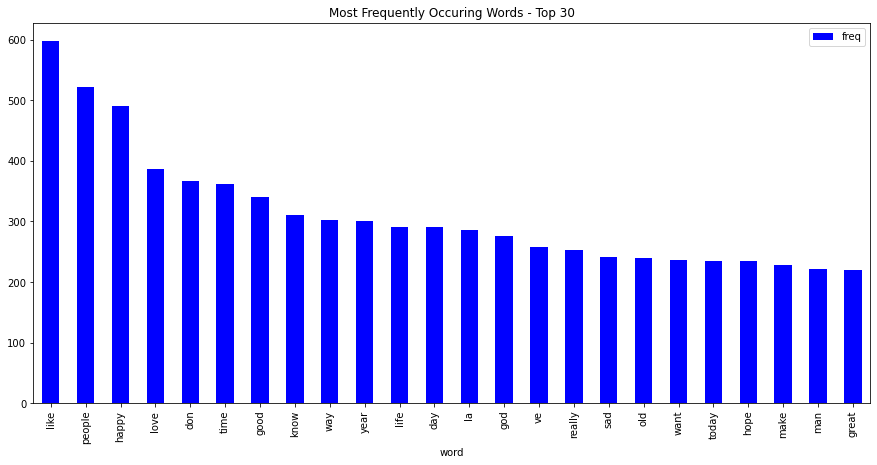

In [27]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(clean_tweets.tweet_without_stopwords)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.iloc[5:29].plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")
plt.savefig("Resources/Most Frequent Words - pie.png")